# Exercise 3 - Principal Component Analysis

## a)Reducing the Dimension of the features Using PCA

### Program 1 - Implementation of PCA in Iris Data Set(From Scratch and using Scikit Learn)

#### AIM:

To implement Principal component analysis from scratch and  using Scikit Learn.

#### ALGORITHM:


1. Standardize the dataset.
2. Calculate the Covariance Matrix.
3. Calculate eigenvalues and eigenvectors of the covariance matrix.
4. Take the n eigenvectors with the highest eigenvalues as the eigenvector subset.
5. Project the dataset into lower dimension by transorming the dataset with the eigenveector subset.

#### Part 1 - Defining function for PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        
    def fit_transform(self,X):
        n = self.n_components
        X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        cov_mat = np.cov(X_standardized, rowvar=False)
        _, eigen_vectors = np.linalg.eigh(cov_mat)  # sorted in ascending order
        self.eigenvector_subset = eigen_vectors[:, :-n-1:-1]  # take last n eigen vec
        return X_standardized @ self.eigenvector_subset

#### Part 2 - Loading Iris Dataset

In [3]:
iris_df = pd.read_csv(
    "./datasets/iris.csv", 
    names = ["sepal length", "sepal width","petal length", "petal width","target"]
)
print('Iris Dataset contains 4 features column to determine the species Name')
print('Shape of the Iris Data:',iris_df.shape)
display(iris_df)

Iris Dataset contains 4 features column to determine the species Name
Shape of the Iris Data: (150, 5)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Part 3 - Implementing PCA in the dataset

In [4]:
iris_X = iris_df.iloc[:,:-1].values
iris_y = iris_df.iloc[:,-1].values
pca = PCA(2)
reduced_iris_X = pca.fit_transform(iris_X)
reduced_iris_df = pd.DataFrame(reduced_iris_X,columns=["PC1","PC2"])
reduced_iris_df["target"] = iris_df["target"]
print("After Feature Dimensional Reduction "
      "from 4 Features column Reduced into 2 PC")
display(reduced_iris_df)

After Feature Dimensional Reduction from 4 Features column Reduced into 2 PC


,PC1,PC2,target
0,2.264542,0.505704,setosa
1,2.086426,-0.655405,setosa
2,2.367950,-0.318477,setosa
3,2.304197,-0.575368,setosa
4,2.388777,0.674767,setosa
...,...,...,...
145,-1.870522,0.382822,virginica
146,-1.558492,-0.905314,virginica
147,-1.520845,0.266795,virginica
148,-1.376391,1.016362,virginica


#### Part 4 - Visualizing the Principal components of the reduced iris dataset

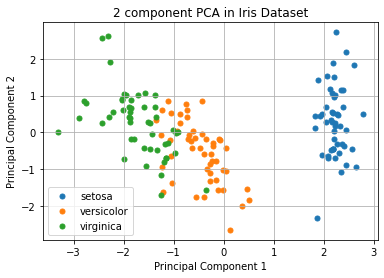

In [5]:
plt.title('2 component PCA in Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
targets = np.unique(iris_y)
for target in targets:
    idxs = iris_y == target
    plt.scatter(
        reduced_iris_X[idxs,0],
        reduced_iris_X[idxs,1],
        s=25,label = target
    )
plt.legend()
plt.grid()
plt.show()

#### Part 5 - Loading the Breast cancer Dataset from scikit Learn

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SklPCA

In [7]:
cancer_data = load_breast_cancer()
cancer_X = cancer_data.data
cancer_y = cancer_data.target_names[cancer_data.target]
cancer_df = pd.DataFrame(
    cancer_X, columns=cancer_data.feature_names)
cancer_df["target"] = cancer_y
cancer_df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


#### Part 6 - Implementing PCA Breast cancer dataset using scikit learn

In [8]:
data_scaler = StandardScaler()
scaled_cancer_X = data_scaler.fit_transform(cancer_X)

skl_pca = SklPCA(n_components=2)
reduced_cancer_X = skl_pca.fit_transform(scaled_cancer_X)

#### Part 7 - Visualizing the Prinical Components of the reduced breast cancer dataset

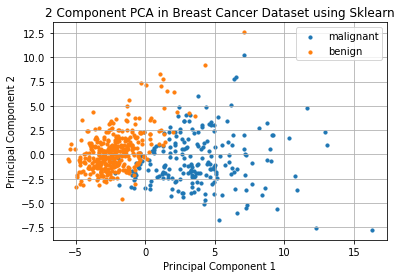

In [9]:
plt.title("2 Component PCA in Breast Cancer Dataset using Sklearn")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for target in cancer_data.target_names:
    idxs = cancer_y == target
    scatter = plt.scatter(
        reduced_cancer_X[idxs, 0], 
        reduced_cancer_X[idxs, 1],
        s=10,label = target
    )
plt.legend()
plt.grid()
plt.show()